<a href="https://colab.research.google.com/github/Seblao/Machine-Learning/blob/main/3.2%20ML%20Clustering%20-%20Clustering%20hi%C3%A9rarchiq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering
Within this, we're going to use Scikit-Learn and Matplotlib to visualize how hierarchical clustering works.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')

In [ ]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
# Remove the several columns for the sake of this exercise (Eliminer les colonnes suivantes...)
df = df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [ ]:
# Remove rows with NaN (Elimine les valeurs Nan) :
df_cleaned = df.dropna()

df_cleaned

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [ ]:
# View the first five rows (Visualise les 5 premières lignes) :
df_cleaned.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


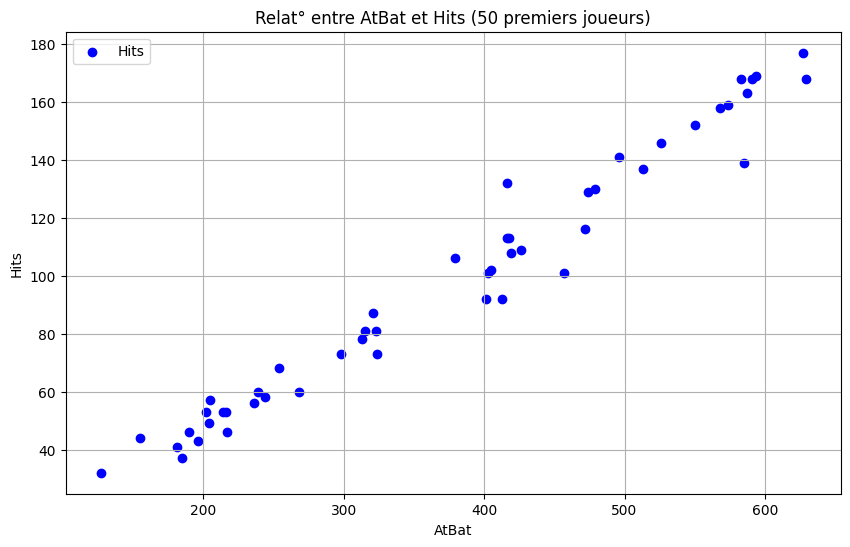

In [ ]:
# Only use the first 50 datapoints of the dataset for easy visualization (visualisation des 50 premiers points de données)
df_50 = df_cleaned.head(50)

# Visualise les données : Exple de graph des 'Hits' par rapport aux 'AtBat':
plt.figure(figsize=(10, 6))
plt.scatter(df_50['AtBat'], df_50['Hits'], color='blue', label='Hits')
plt.title('Relat° entre AtBat et Hits (50 premiers joueurs)')
plt.xlabel('AtBat')
plt.ylabel('Hits')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# View the shape of the data frame. It should be (50, 17) (Visualisat° du bloc de données : (50, 17))
df_50 = df_cleaned.head(50)

# Affiche la forme du DataFrame :
print("Forme du DataFrame (50 premiers points) : ", df_50.shape)

Forme du DataFrame (50 premiers points) :  (50, 17)


In [ ]:
# Using the AgglomerativeClustering() function with a distance threshold of 0 and no n_clusters, fit the dataset (À l'aide de AgglomerativeClustering() avec 1 seuil de distce 0 et aucun n_clusters, ajuster l'ensble de données)
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Initialise l'algorithme AgglomerativeClustering :
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Ajuste le mdèle sur les données :
model.fit(df_numeric)

# Affiche les labels attribués aux pts de données :
print("Labels attribués par AgglomerativeClustering : ", model.labels_)

# Affiche la frme du DataFrame et des labels :
print("Frme du DataFrame après clustering : ", df_numeric.shape)

# Affiche le nb de clusters formés :
print("Nb de clusters frmés (n_clusters_):", len(set(model.labels_)))

# Affiche la distance mini et maxi :
print("Distce mini de fus°:", model.distances_.min())
print("Distce max de fus°:", model.distances_.max())

Labels attribués par AgglomerativeClustering :  [165 141 159 215 145 235 213 253 175 222 150 238 203 177 181 142 240 259
 246 155 243 176 223 227 151 137 249 180  87 162 257 260 247 212 232 220
 202 239 261 241 236 172 237 146 178 250 207 230 251 221 256 217 133 258
 255 163 171 229 186 132 152 231 252 201 233 244 114 135 143 195 128 125
 188 167 228 140 216 115 179 174 262 118 189 199 254 134 234 191 183 160
 116 157 131 185 136  70 164 194 147 198 196  65 242 138 226 187 200  81
 190 154 161  94 158 218  93  75 130 139 121 248  67 197 225 113 204 127
  99  79 208  98 117 156 149 108 119 112 126 211 153  88 210  76 214 124
 209  68  46 106 245  78 123  63 129 100 169  61 122 104 148 110  64 168
 120  33 173 192  62 219  74 182 184  83  69  34  86 224 109  92  66 107
 193  77 101  38 170  60  53  59  80 206 111  95  91  97  96  58  49  16
  73 105  45 166  57  29  31  52  82  40 144  48 205  84 103  72  39  56
  55  28  22  54  30 102  90  50  27  89  44  32  24  14  41  71  47  85
  4

In [ ]:
# Print out the distances of that model (Imprimer les distces du mdèle : ex : n_clusters_, min() et max())
# I.e. n_clusters_, min(), and max()

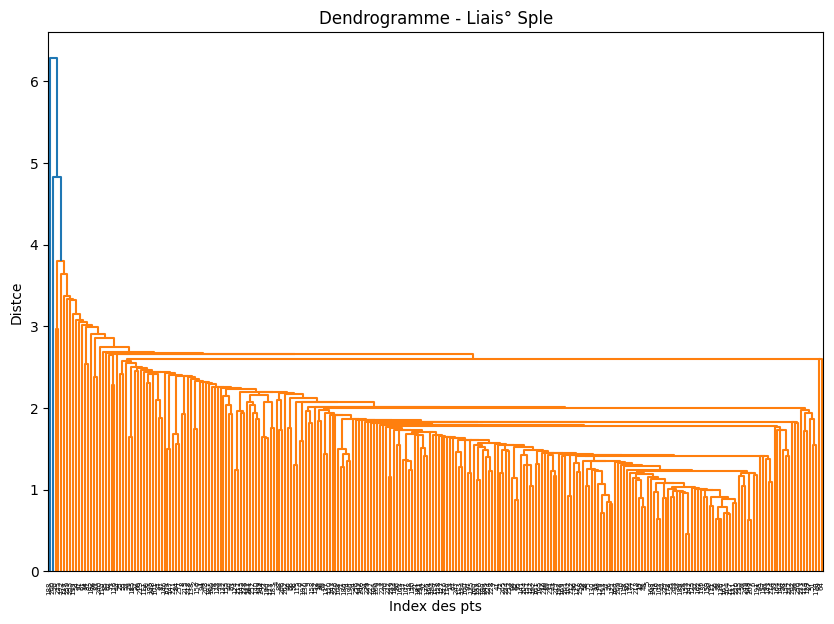

In [ ]:
# Single
# Using single linkage, create and display a dendogram (À l'aide d'1 liais° sple, créer et afficher 1 dendrogramme)
# Nrmalise les données :
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Appliq le clustering hiérarchique avec liais° sple :
Z = linkage(df_scaled, method='single')

# Affiche le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogramme - Liais° Sple")
plt.xlabel("Index des pts")
plt.ylabel("Distce")
plt.show()

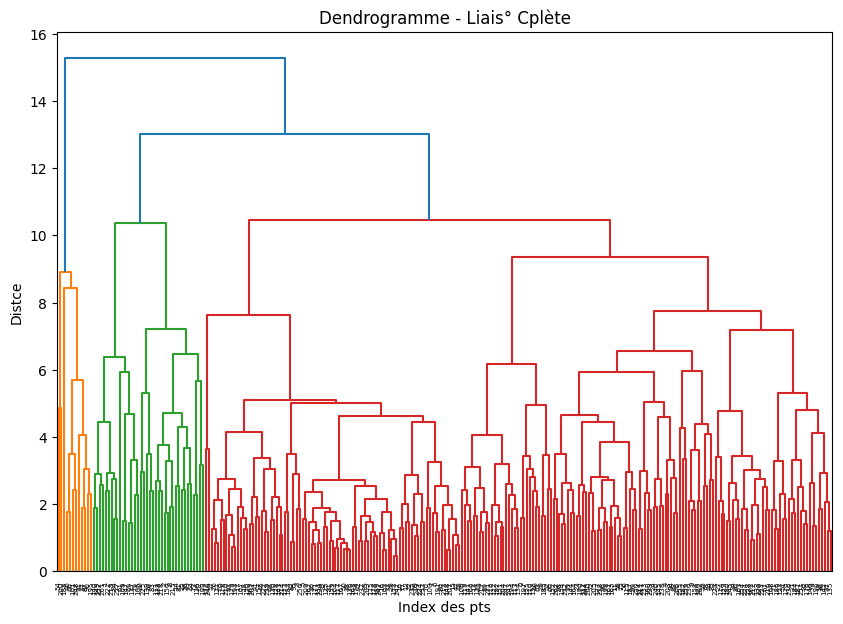

In [ ]:
# Complete
# Using complete linkage, create and display a dendogram. (À l'aide d'1 liais° cplète, créer et afficher 1 dendrogramme)
# Nrmalise les données :
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Appliq le clustering hiérarchiq avec liais° cplète :
Z = linkage(df_scaled, method='complete')

# Affiche le dendrogramme :
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogramme - Liais° Cplète")
plt.xlabel("Index des pts")
plt.ylabel("Distce")
plt.show()

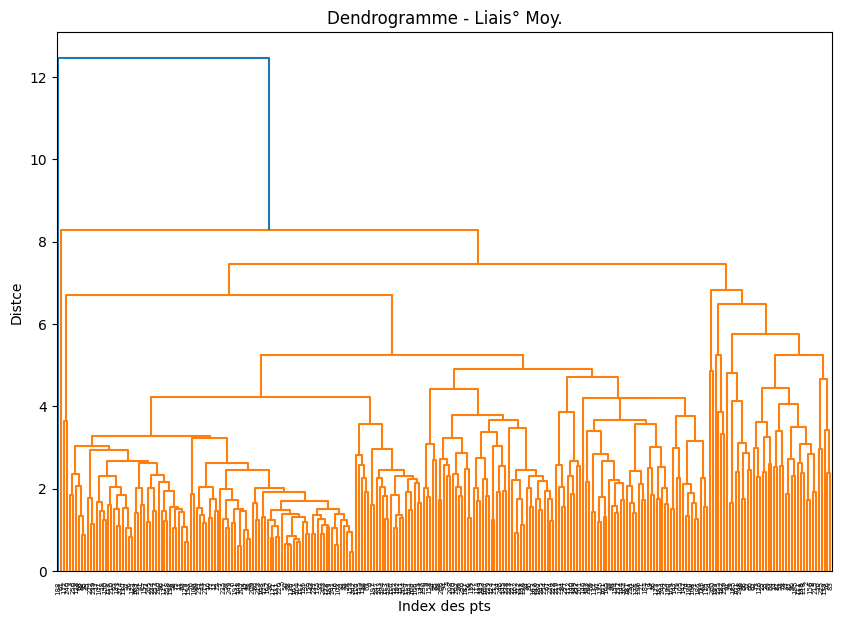

In [ ]:
# Average
# Using average linkage, create and display a dendogram. (À l'aide d'1 liais° moy., créer et afficher 1 dendrogramme.)
# Nrmalise les données :
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Appliq le clustering hiérarchiq avec liais° moy. :
Z = linkage(df_scaled, method='average')

# Affiche le dendrogramme :
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogramme - Liais° Moy.")
plt.xlabel("Index des pts")
plt.ylabel("Distce")
plt.show()

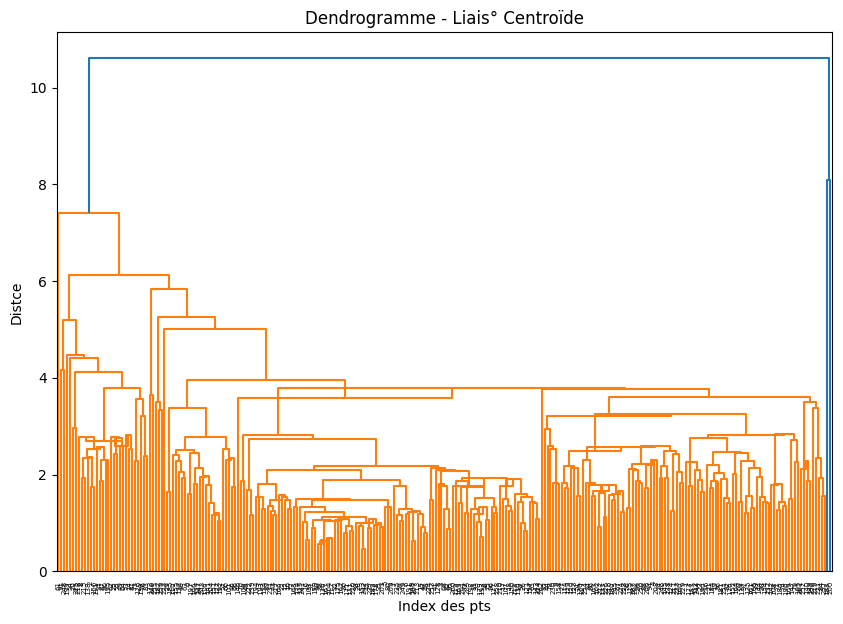

In [ ]:
# Centroid
# Using centroid linkage, create and display a dendogram. (À l'aide de la liais° centroïde, créer et afficher 1 dendrogramme.)
# Nrmalise les données :
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Appliq le clustering hiérarchiq avec liais° centroïde :
Z = linkage(df_scaled, method='centroid')

# Affiche le dendrogramme :
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogramme - Liais° Centroïde")
plt.xlabel("Index des pts")
plt.ylabel("Distce")
plt.show()

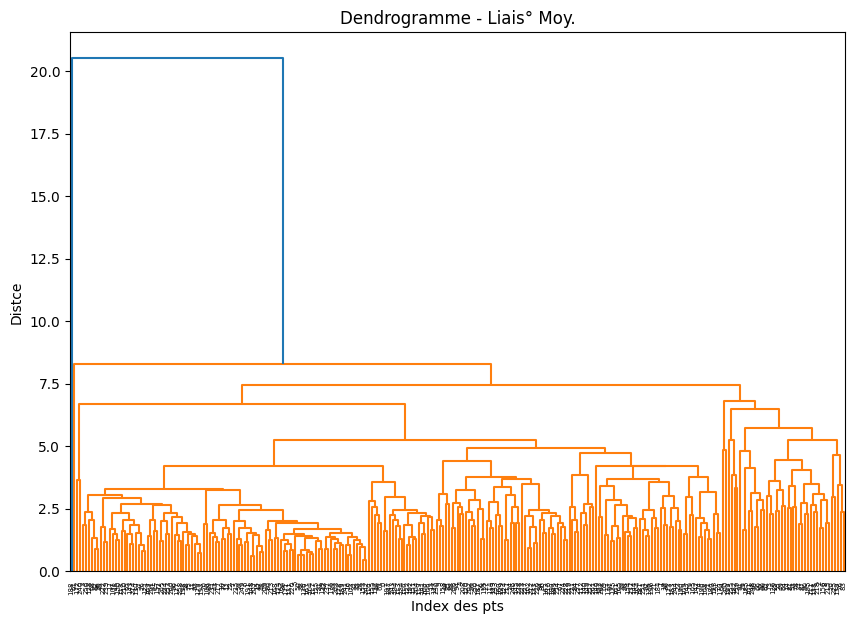

Libellés des pts du Cluster 1:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 37, 40, 43, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 65, 67, 68, 70, 72, 73, 74, 75, 76, 78, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 100, 102, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 159, 161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 202, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 231, 232, 233, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248, 249, 251, 252, 255, 256, 257, 258, 259, 260, 261, 262, 263

In [ ]:
# After observing the dendograms above, let's say that you want to choose "Average" linkage with only 2 clusters. (# Après avoir observé les dendrogrammes ci-dessus, on suppose de choisir 1 lien « Moy. » avec seulemt 2 clusters.
# Quels st les libellés de chaq pt de données ?)
# What are the labels of each of the datapoints?
# Print these labels out

# Nrmalisat° des données :
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Clustering hiérarchiq avec la méthode de liais° moy. :
Z = linkage(df_scaled, method='average')

# Affichage du dendrogramme :
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogramme - Liais° Moy.")
plt.xlabel("Index des pts")
plt.ylabel("Distce")
plt.show()

# Coupe l'arbre pr n'obtenir q 2 clusters :
clusters = fcluster(Z, t=2, criterion='maxclust')

# Affiche les libellés des pts ds chaq cluster :
df_numeric['Cluster'] = clusters

# Affiche les pts ds chaq cluster :
cluster_1 = df_numeric[df_numeric['Cluster'] == 1]
cluster_2 = df_numeric[df_numeric['Cluster'] == 2]

print("Libellés des pts du Cluster 1:")
print(cluster_1.index.tolist())

print("Libellés des pts du Cluster 2:")
print(cluster_2.index.tolist())